# Bandit-Problem

## bandit的主要问题之一：如何平衡探索(explore)和利用(exploit)  
  
  平衡探索与利用问题，也叫做EE平衡问题，是在人们在作选择时客观存在的问题之一。探索与利用是相互矛盾的，互为阴阳。探索可以让你进行新的尝试而避免陷入一味的保守，但是新的尝试带来的也可能是不尽人意。利用只会使用自己当前最满意的选择而无法获得其他选择带来新鲜感，但是也省去了一味的盲目尝试且节约了时间精力。  
  
当然，最不费脑地平衡探索与利用的方就是随机选择，这也就是生活常看到的拿不定主意的时候抛个骰子的情景。人生那么长，不可能把所有选择都交给随机的骰子，从实际生活中看，人们作选择的时候总是会考量一番而避免瞎蒙，可以预见地是，随机选择极大可能会使自己过得很惨。那么除了随机选择方法之外，目前平衡探索和利用这一阴一阳的方法主要有如下4种：  
- uniform greedy方法  
- $\epsilon$ greedy方法  
- UCB方法   
- Tompson sampling方法  

衡量这些方法，其实就是看在时间 $t$ 我们根据这些方法作出选择时是否有遗憾 $regret$，以及慢慢人生路上会累积多少遗憾$regrets$，因此用累积遗憾来衡量这些方法的好坏 $ regrets=\sum regret(t) $。如果这个方法让你感到无比遗憾和后悔时，那么这个方法对你来说就是不好的方法。

## 方法效果对比

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [142]:
class Bandit():
    def __init__(self):
        self.steps = 100
        self.arms = 3
        self.epsilon = 0.4
        self.arms_rewords_bernoulli = [0.6, 0.4, 0.8]
        self.best_reword = np.max(self.arms_rewords_bernoulli)
        self.estimate_rewords = 0.5 * np.ones((self.arms, self.steps))
        self.positive_feedback = [1, 1, 1]
        self.negative_feedback = [1, 1, 1]
        self.regrets = [0]
        self.choices = np.zeros(self.steps)
        pass
    
    def rand_choice(self):
        for t in range(self.steps):
            # estimate model
            for k in range(self.arms):
                r = ((float) (self.positive_feedback[k]) / (self.positive_feedback[k] + self.negative_feedback[k]))
                self.estimate_rewords[k][t] = r
                
            # choice action
            best_action = np.random.choice(range(self.arms))
            self.choices[t] = best_action 
    
            # apply action and observe
            bernoulli = stats.bernoulli(self.arms_rewords_bernoulli[best_action])
            posi = bernoulli.rvs()
            negt = 1 - posi
            
            # update estimate
            self.positive_feedback[best_action] += posi
            self.negative_feedback[best_action] += negt
            
            # regret
            regret = self.best_reword - self.arms_rewords_bernoulli[best_action]
            self.regrets.append(self.regrets[-1] + regret)
            
            # update memory
            
        # plot
        fig, ax = plt.subplots()
        for k in range(self.arms):
            ax.plot(range(self.steps), self.estimate_rewords[k], label='action_%s(%s)' % (k, self.arms_rewords_bernoulli[k]))
        ax.plot(range(self.steps), -0.1 * self.choices, label = 'choice')
        ax.set(title="rand-choice-estimate-rewords")
        ax.legend()
        
        return self.regrets
    
    
    def uniform_greedy(self):
        for t in range(self.steps):
            # estimate model
            for k in range(self.arms):
                r = ((float) (self.positive_feedback[k]) / (self.positive_feedback[k] + self.negative_feedback[k]))
                self.estimate_rewords[k][t] = r
                
            # choice action
            if t < self.epsilon * self.steps:
                best_action = np.random.choice(range(self.arms))
            else:
                best_action = np.argmax(self.estimate_rewords[...,t])
            self.choices[t] = best_action 
    
            # apply action and observe
            bernoulli = stats.bernoulli(self.arms_rewords_bernoulli[best_action])
            posi = bernoulli.rvs()
            negt = 1 - posi
            
            # update estimate
            self.positive_feedback[best_action] += posi
            self.negative_feedback[best_action] += negt
            
            # regret
            regret = self.best_reword - self.arms_rewords_bernoulli[best_action]
            self.regrets.append(self.regrets[-1] + regret)
            
            # update memory
            
        # plot
        fig, ax = plt.subplots()
        for k in range(self.arms):
            ax.plot(range(self.steps), self.estimate_rewords[k], label='action_%s(%s)' % (k, self.arms_rewords_bernoulli[k]))
        ax.plot(range(self.steps), -0.1 * self.choices, label = 'choice')
        ax.set(title="uniform-greedy-estimate-rewords")
        ax.legend()
        
        return self.regrets
    

    def e_greedy(self):
        for t in range(self.steps):
            # estimate model
            for k in range(self.arms):
                r = ((float) (self.positive_feedback[k]) / (self.positive_feedback[k] + self.negative_feedback[k]))
                self.estimate_rewords[k][t] = r
                
            # choice action
            if np.random.rand() < self.epsilon:
                best_action = np.random.choice(range(self.arms))
            else:
                best_action = np.argmax(self.estimate_rewords[...,t])
            self.choices[t] = best_action 
    
            # apply action and observe
            bernoulli = stats.bernoulli(self.arms_rewords_bernoulli[best_action])
            posi = bernoulli.rvs()
            negt = 1 - posi
            
            # update estimate
            self.positive_feedback[best_action] += posi
            self.negative_feedback[best_action] += negt
            
            # regret
            regret = self.best_reword - self.arms_rewords_bernoulli[best_action]
            self.regrets.append(self.regrets[-1] + regret)
            
            # update memory
            
        # plot
        fig, ax = plt.subplots()
        for k in range(self.arms):
            ax.plot(range(self.steps), self.estimate_rewords[k], label='action_%s(%s)' % (k, self.arms_rewords_bernoulli[k]))
        ax.plot(range(self.steps), -0.1 * self.choices, label = 'choice')
        ax.set(title="e-greedy-estimate-rewords")
        ax.legend()
        
        return self.regrets
    
    
    def adaptive_e_greedy(self):
        for t in range(self.steps):
            # estimate model
            for k in range(self.arms):
                r = ((float) (self.positive_feedback[k]) / (self.positive_feedback[k] + self.negative_feedback[k]))
                self.estimate_rewords[k][t] = r
                
            # choice action
            if np.random.rand() < self.epsilon * (1.0 - t/self.steps):
                best_action = np.random.choice(range(self.arms))
            else:
                best_action = np.argmax(self.estimate_rewords[...,t])
            self.choices[t] = best_action 
    
            # apply action and observe
            bernoulli = stats.bernoulli(self.arms_rewords_bernoulli[best_action])
            posi = bernoulli.rvs()
            negt = 1 - posi
            
            # update estimate
            self.positive_feedback[best_action] += posi
            self.negative_feedback[best_action] += negt
            
            # regret
            regret = self.best_reword - self.arms_rewords_bernoulli[best_action]
            self.regrets.append(self.regrets[-1] + regret)
            
            # update memory
            
        # plot
        fig, ax = plt.subplots()
        for k in range(self.arms):
            ax.plot(range(self.steps), self.estimate_rewords[k], label='action_%s(%s)' % (k, self.arms_rewords_bernoulli[k]))
        ax.plot(range(self.steps), -0.1 * self.choices, label = 'choice')
        ax.set(title="adaptive_e_greedy-estimate-rewords")
        ax.legend()
        
        return self.regrets
    
    
    def ucb(self):
        pass
    
    def tompson_sampling(self):
        for t in range(self.steps):
            # estimate model
            for k in range(self.arms):
                r = stats.beta(self.positive_feedback[k], self.negative_feedback[k]).rvs()
                self.estimate_rewords[k][t] = r
                
            # choice action
            best_action = np.argmax(self.estimate_rewords[...,t])
            self.choices[t] = best_action 
    
            # apply action and observe
            bernoulli = stats.bernoulli(self.arms_rewords_bernoulli[best_action])
            posi = bernoulli.rvs()
            negt = 1 - posi
            
            # update estimate
            self.positive_feedback[best_action] += posi
            self.negative_feedback[best_action] += negt
            
            # regret
            regret = self.best_reword - self.arms_rewords_bernoulli[best_action]
            self.regrets.append(self.regrets[-1] + regret)
            
            # update memory
            
        # plot
        fig, ax = plt.subplots()
        for k in range(self.arms):
            ax.plot(range(self.steps), self.estimate_rewords[k], label='action_%s(%s)' % (k, self.arms_rewords_bernoulli[k]))
        ax.plot(range(self.steps), -0.1 * self.choices, label = 'choice')
        ax.set(title="ts-estimate-rewords")
        ax.legend()
        
        return self.regrets
    
    
    def compare(self):
        bandit = Bandit()
        regrets_rand = Bandit().rand_choice()
        regrets_uniform = Bandit().uniform_greedy()
        regrets_e_greedy = Bandit().e_greedy()
        regrets_adaptive_e_greedy = Bandit().adaptive_e_greedy()
        regrets_tompson_sampling = Bandit().tompson_sampling()
        
        fig2, ax2 = plt.subplots()
        ax2.plot(range(self.steps), regrets_rand[0:-1], label = 'rand')
        ax2.plot(range(self.steps), regrets_uniform[0:-1], label = 'uniform')
        ax2.plot(range(self.steps), regrets_e_greedy[0:-1], label = 'e_greedy')
        ax2.plot(range(self.steps), regrets_adaptive_e_greedy[0:-1], label = 'adaptive_e_greedy')
        ax2.plot(range(self.steps), regrets_tompson_sampling[0:-1], label = 'tompson_sampling')
        ax2.set(title="regret")
        ax2.legend()
        plt.show()

        pass

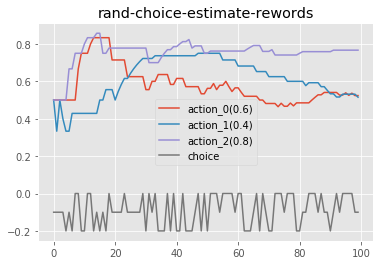

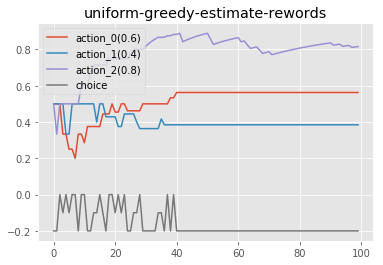

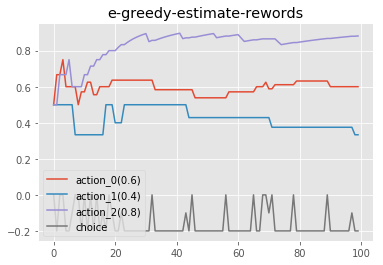

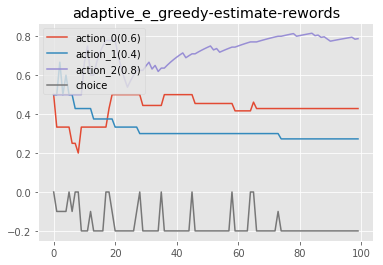

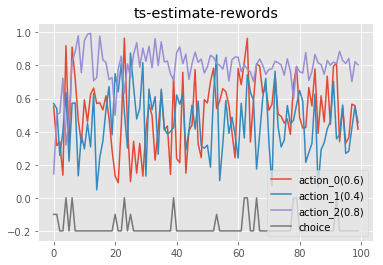

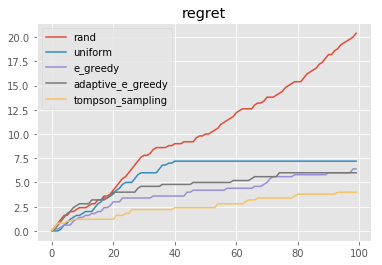

In [143]:
bandit = Bandit()
bandit.compare()


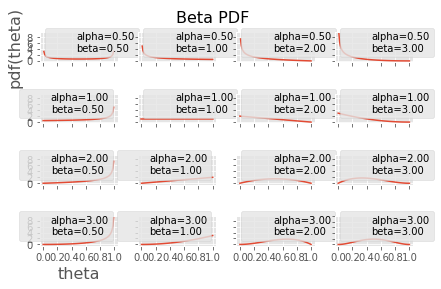

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib import style
style.use('ggplot')
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        alpha = params[i]
        beta = params[j]
        pdf = stats.beta(alpha, beta).pdf(x)
        ax[i, j].plot(x, pdf)
        ax[i, j].plot(0, 0, label='alpha={:3.2f}\nbeta={:3.2f}'.format(alpha, beta), alpha=0)
        plt.setp(ax[i, j], xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], yticks=[0,2,4,6,8,10])
        ax[i, j].legend(fontsize=10)
ax[3, 0].set_xlabel('theta', fontsize=16)
ax[0, 0].set_ylabel('pdf(theta)', fontsize=16)
plt.suptitle('Beta PDF', fontsize=16)
plt.tight_layout()
plt.show()


In [123]:
np.random.rand(100)

array([0.50691587, 0.54913964, 0.80390282, 0.40013774, 0.15413756,
       0.17304538, 0.16111065, 0.85464907, 0.59738681, 0.00370632,
       0.03143465, 0.67785284, 0.93852038, 0.33966855, 0.05200124,
       0.8933306 , 0.01761432, 0.76675166, 0.89406736, 0.69424886,
       0.81193723, 0.10084715, 0.03600039, 0.62585448, 0.13970863,
       0.21328358, 0.01232067, 0.17846134, 0.07687142, 0.46617922,
       0.65742991, 0.35563085, 0.82525761, 0.91862502, 0.58853601,
       0.09070683, 0.67771396, 0.31892518, 0.57783049, 0.08534002,
       0.02486186, 0.30208142, 0.7926595 , 0.18970747, 0.85161046,
       0.67566116, 0.82515443, 0.00472305, 0.37579207, 0.71144743,
       0.88555022, 0.78651187, 0.80558197, 0.69224249, 0.36828265,
       0.36505265, 0.40856987, 0.44549992, 0.39472534, 0.93161412,
       0.23604815, 0.21900833, 0.50225994, 0.49409324, 0.41415823,
       0.71743563, 0.21220587, 0.10178864, 0.09348789, 0.77932452,
       0.79733883, 0.53158883, 0.59954507, 0.51843977, 0.03620